In [18]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

EDA and Preprocessing

In [19]:
train = pd.read_csv('Titanic_train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [22]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

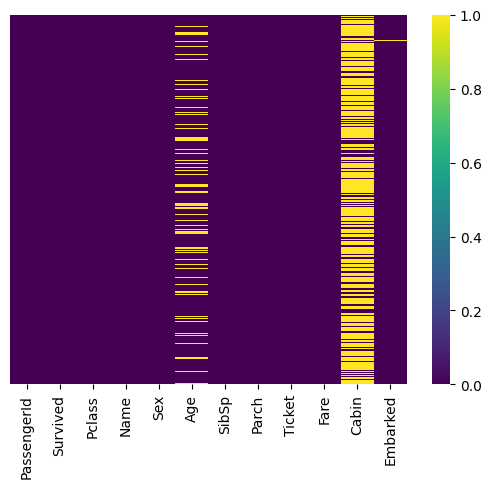

In [24]:
sn.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

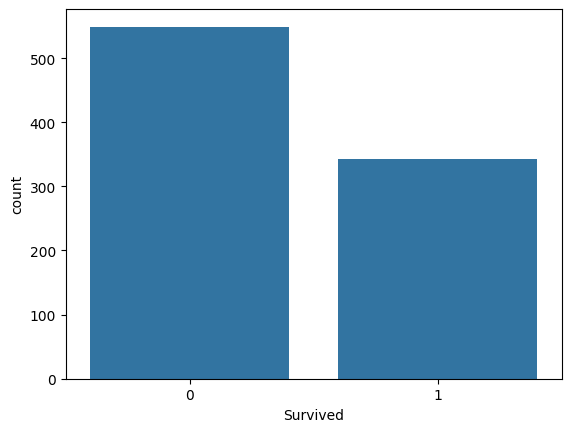

In [26]:
sn.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

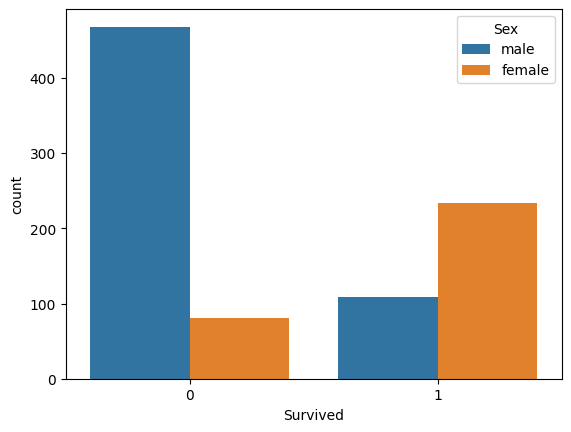

In [27]:
sn.countplot(x='Survived',hue='Sex',data=train)

<Axes: xlabel='Survived', ylabel='count'>

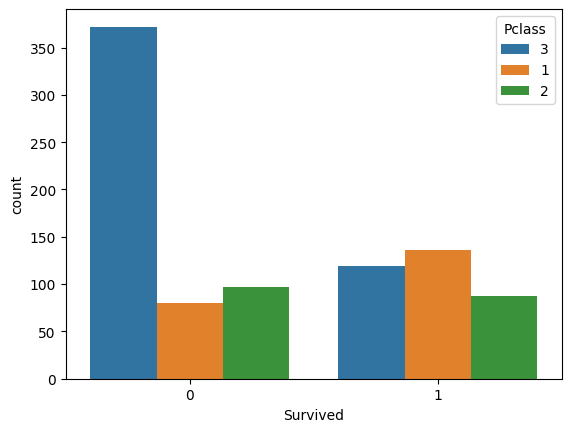

In [29]:
sn.countplot(x='Survived',hue=train['Pclass'].astype('str'),data=train)

<Axes: xlabel='Age'>

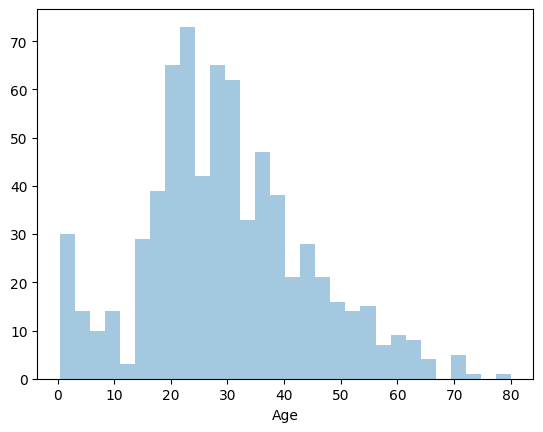

In [30]:
sn.distplot(train['Age'].dropna(),kde=False,bins=30)

In [31]:
cols = train.columns

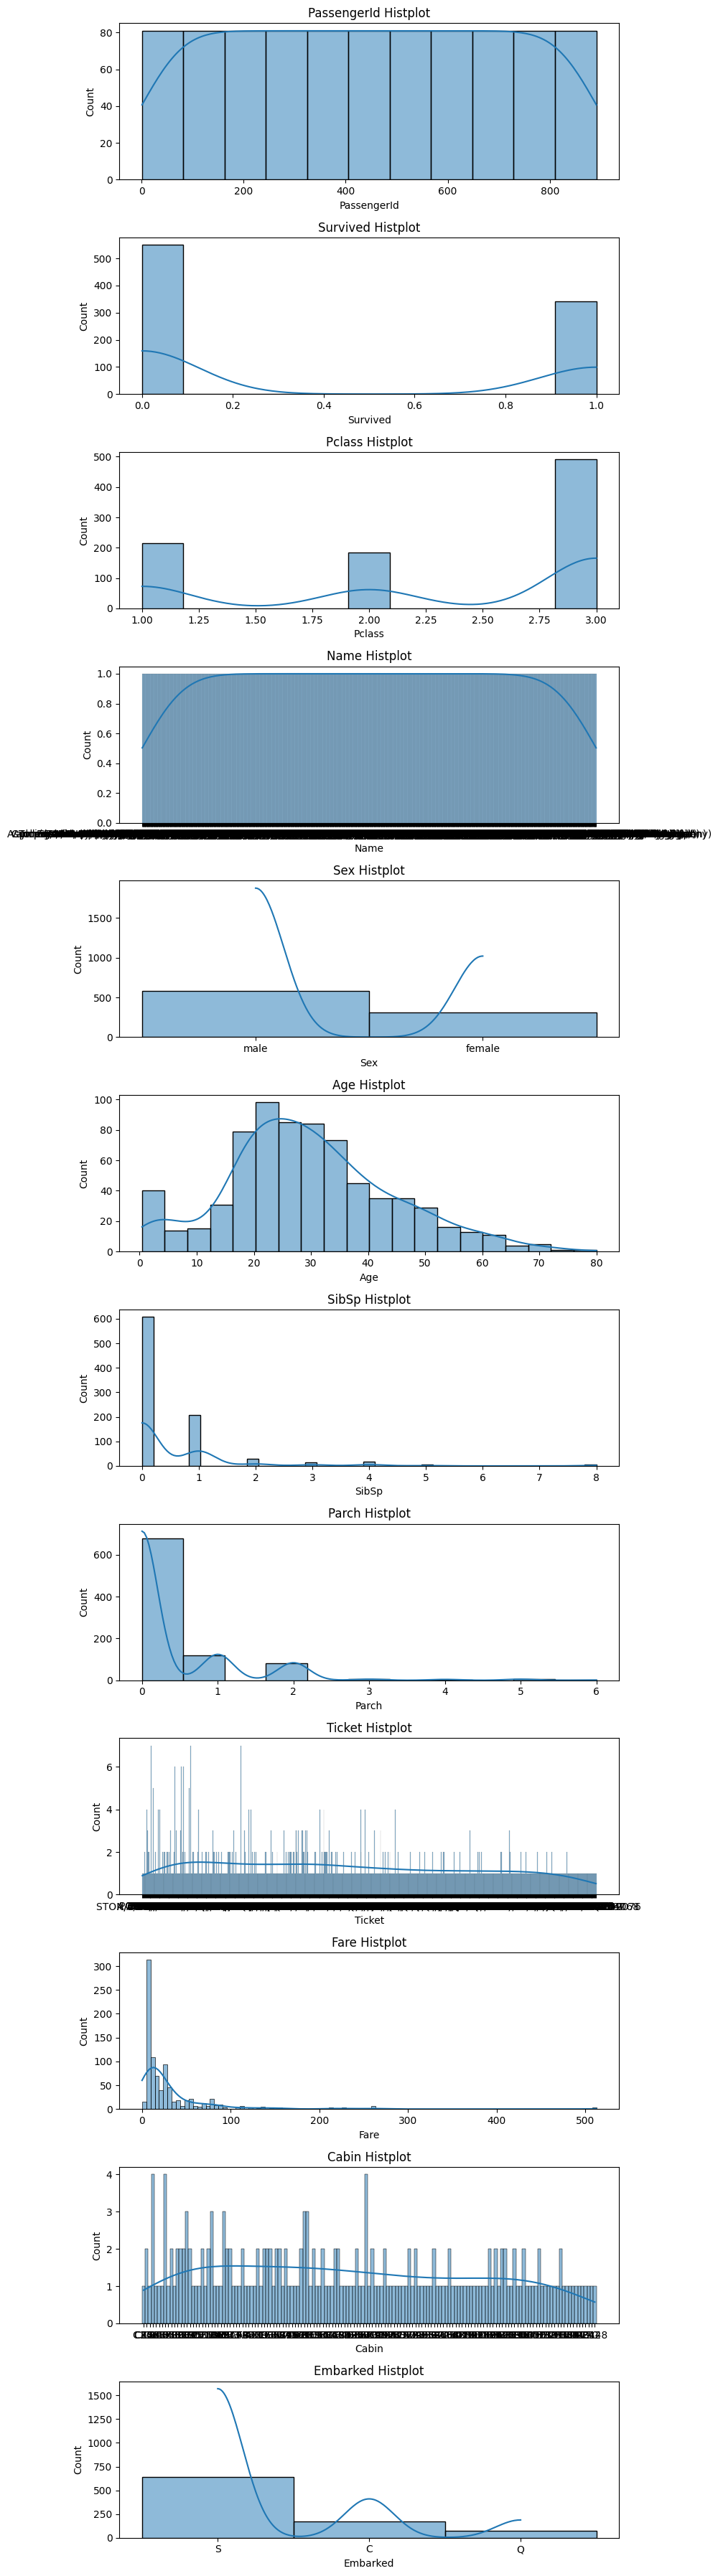

In [37]:
plt.figure(figsize=(10,len(cols)*3))
for i,fe in enumerate(cols,1):
    plt.subplot(len(cols),1,i)
    sn.histplot(data=train,x=fe,kde=True,palette='viridis')
    plt.title(f'{fe} Histplot')
    plt.xlabel(fe)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [38]:
num_cols = []

In [39]:
for col in train.columns:
    if train[col].dtype == 'int64':
        num_cols.append(col)
    if train[col].dtype == 'float64':
        num_cols.append(col)

In [40]:
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

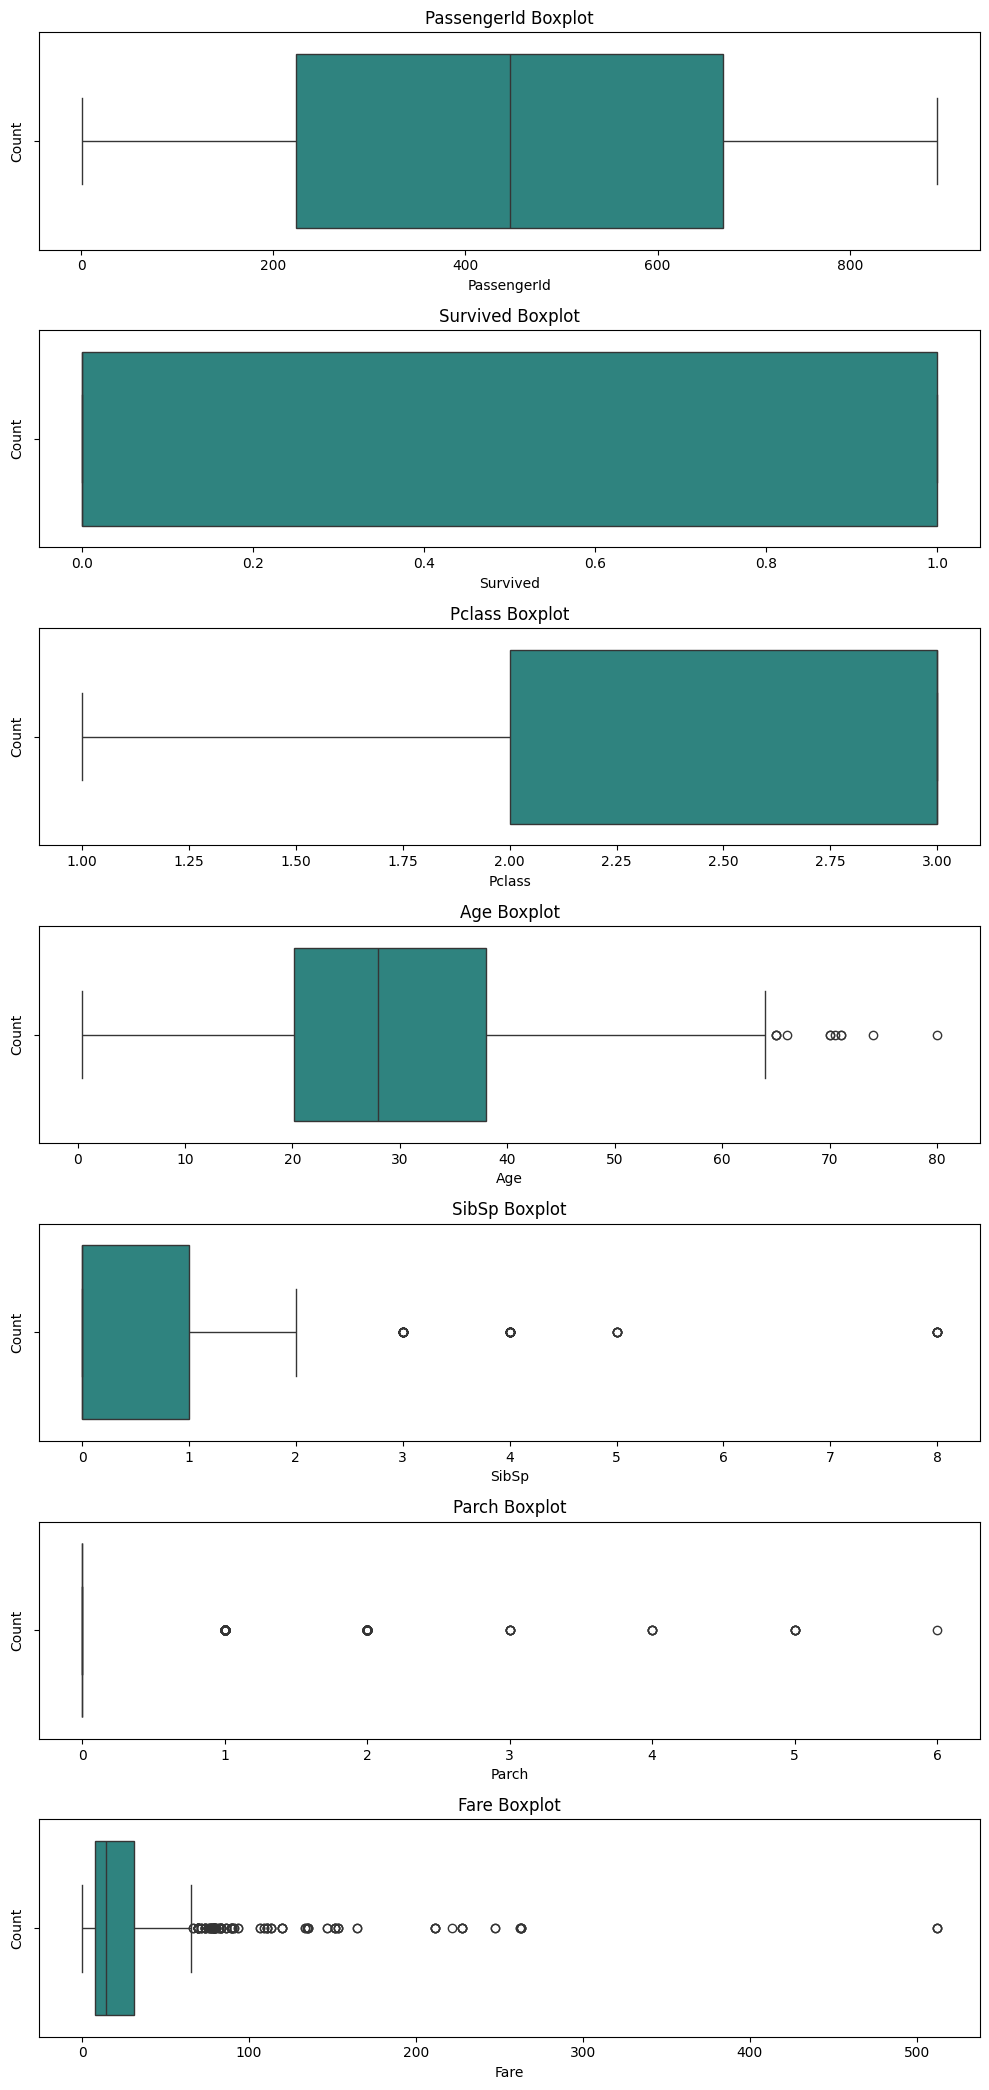

In [41]:
plt.figure(figsize=(10,len(num_cols)*3))
for i,fe in enumerate(num_cols,1):
    plt.subplot(len(num_cols),1,i)
    sn.boxplot(data=train,x=fe,palette='viridis')
    plt.title(f'{fe} Boxplot')
    plt.xlabel(fe)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

<Axes: xlabel='SibSp', ylabel='count'>

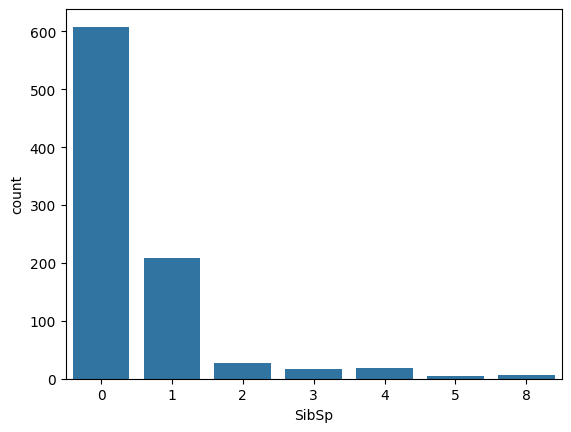

In [42]:
sn.countplot(x='SibSp',data=train)

In [43]:
numeric_df = train.select_dtypes(include=['int64','float64'])

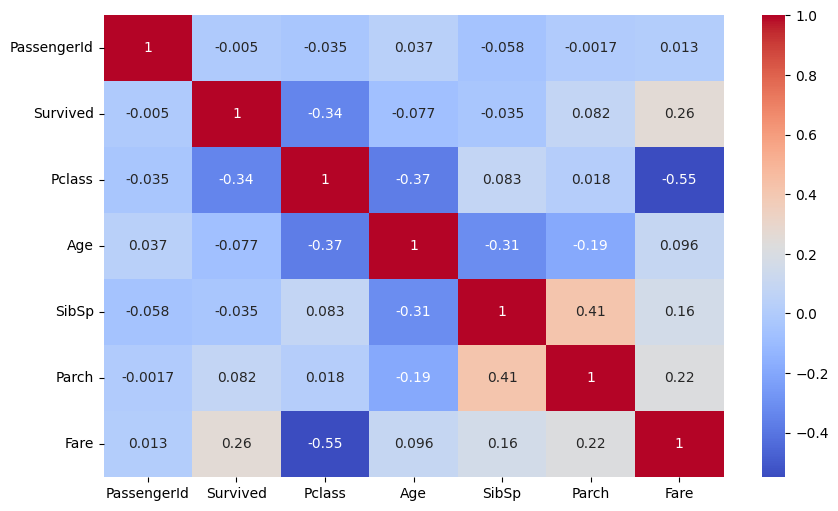

In [44]:
plt.figure(figsize=(10,6))
sn.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

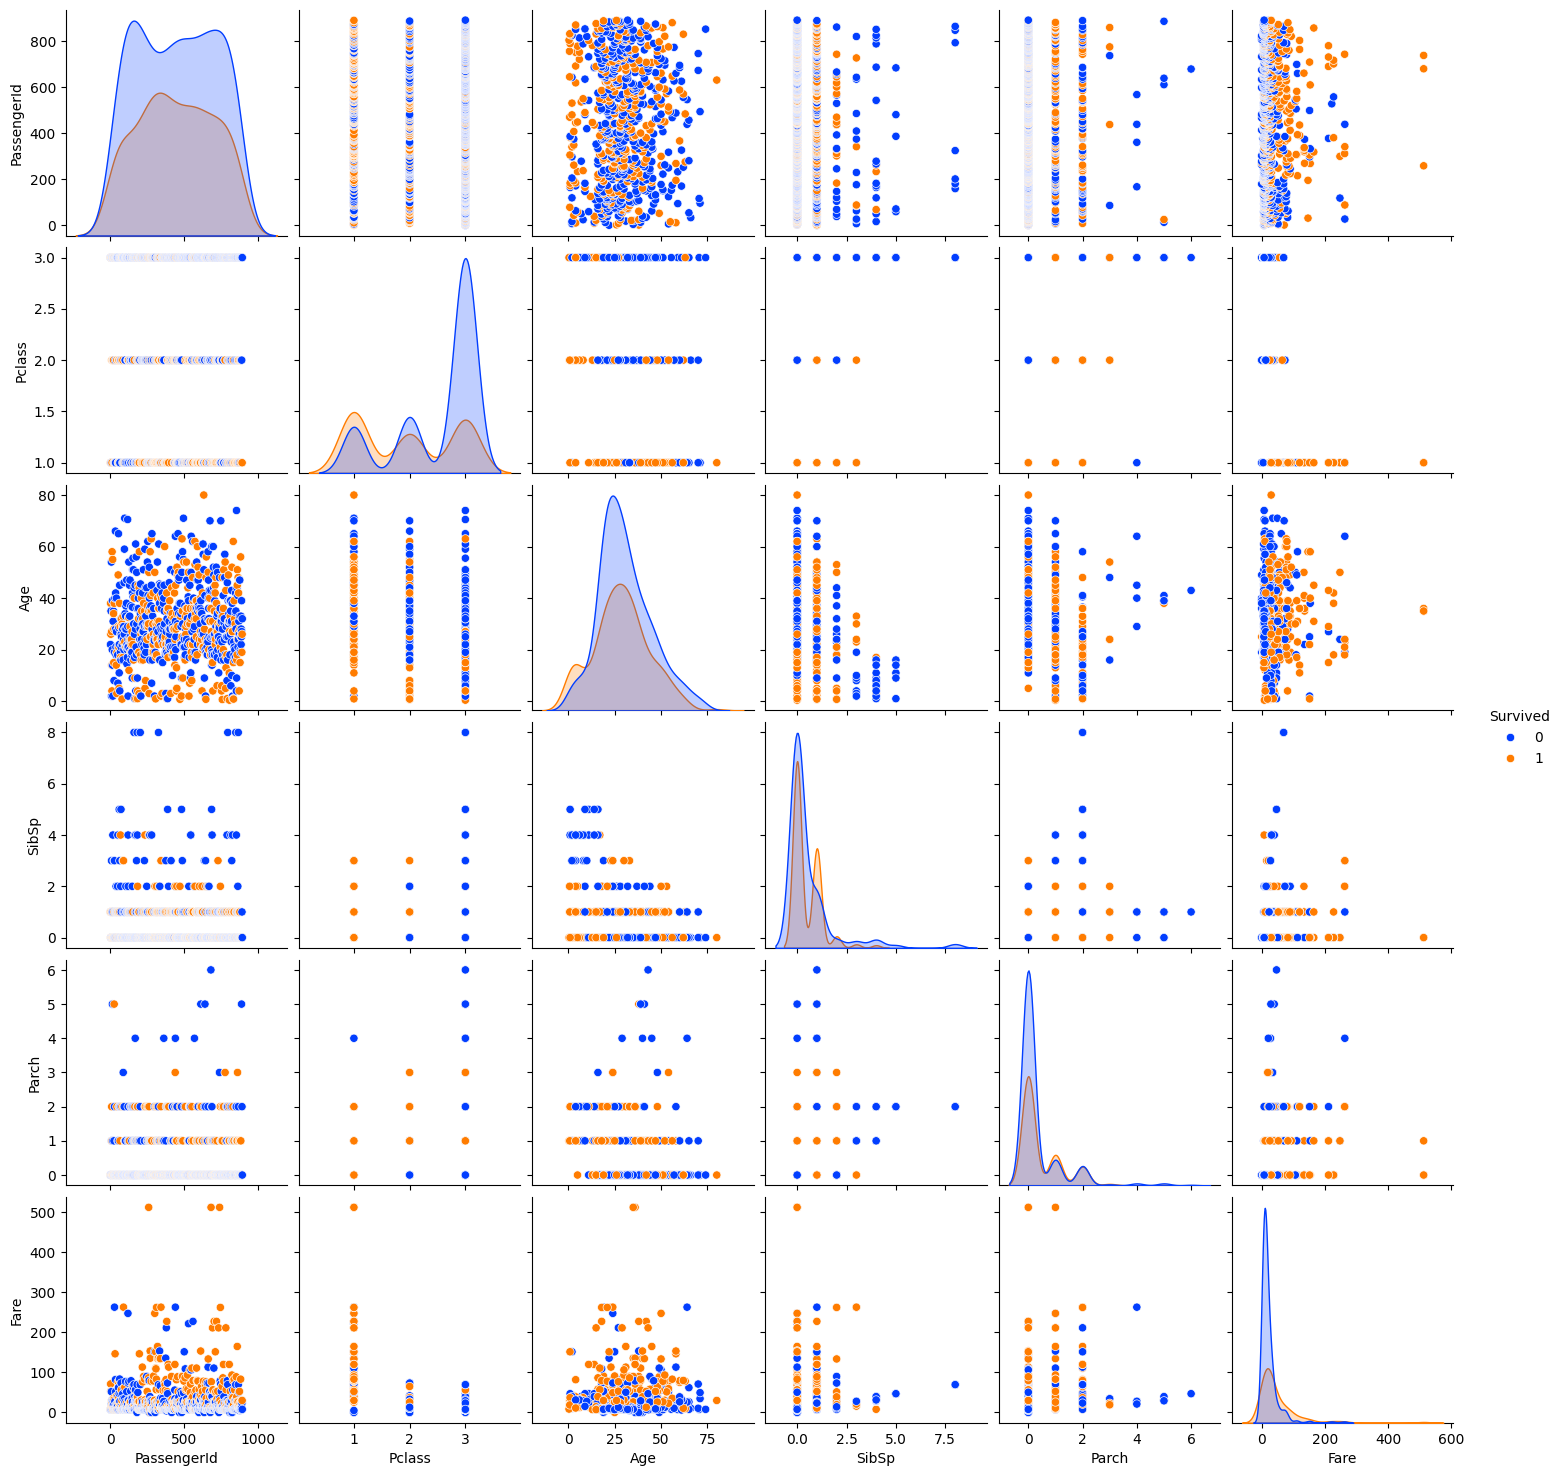

In [46]:
sn.pairplot(train,hue='Survived',palette='bright')

<Axes: xlabel='Pclass', ylabel='Age'>

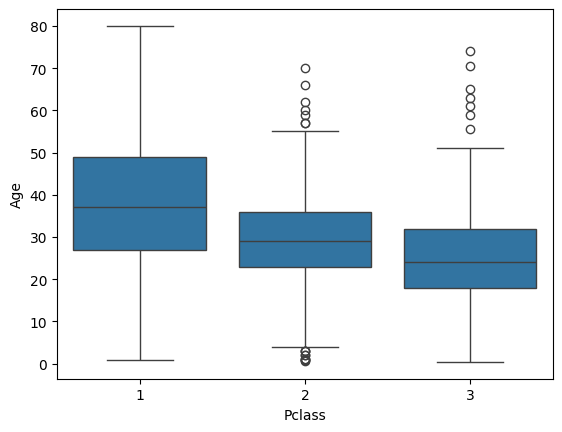

In [48]:
sn.boxplot(x='Pclass',y='Age',data=train)

In [49]:
train['Age'].groupby(train['Pclass']).mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [50]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [51]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

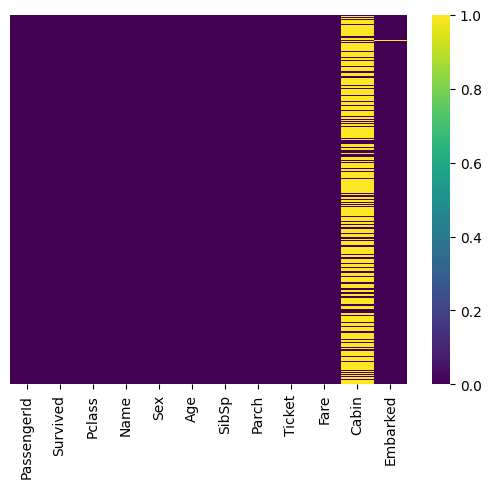

In [52]:
sn.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [53]:
train.drop('Cabin',axis=1,inplace=True)

In [54]:
train.dropna(inplace=True)

<Axes: >

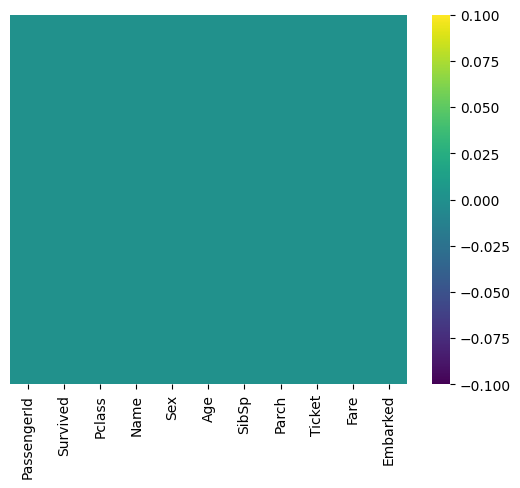

In [55]:
sn.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [56]:
data = pd.get_dummies(train,columns=['Sex','Embarked'],dtype='int64',drop_first=True)

In [57]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


Building Predictive Models

In [58]:
X = data.drop(['PassengerId','Name','Ticket','Survived'],axis=1)
y = data['Survived']

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from xgboost import XGBClassifier

In [62]:
xgbm_model = XGBClassifier(n_estimators=90,max_depth=3)

In [63]:
xgbm_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=90, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [64]:
xg_pred = xgbm_model.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [66]:
accuracy_score(y_test, xg_pred)

0.8146067415730337

In [67]:
print(classification_report(y_test,xg_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       109
           1       0.77      0.74      0.76        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



In [68]:
from lightgbm import LGBMClassifier

In [69]:
lgbm_model = LGBMClassifier()

In [70]:
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 271, number of negative: 440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381153 -> initscore=-0.484656
[LightGBM] [Info] Start training from score -0.484656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [71]:
lg_pred = lgbm_model.predict(X_test)

In [72]:
accuracy_score(y_test, lg_pred)

0.8089887640449438

In [73]:
print(classification_report(y_test,lg_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       109
           1       0.75      0.75      0.75        69

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



In [74]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [75]:
xgbm_cv_scores = cross_val_score(xgbm_model, X_train, y_train, cv=5)
print("XGBoost CV Accuracy: ", xgbm_cv_scores.mean())

XGBoost CV Accuracy:  0.8298138481237073


In [76]:
lgbm_cv_scores = cross_val_score(lgbm_model, X_train, y_train, cv=5)
print("LightGBM CV Accuracy: ", lgbm_cv_scores.mean())

[LightGBM] [Info] Number of positive: 216, number of negative: 352
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 188
[LightGBM] [Info] Number of data points in the train set: 568, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.380282 -> initscore=-0.488353
[LightGBM] [Info] Start training from score -0.488353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [77]:
xgbm_param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100]
}

In [78]:
xgbm_grid_search = GridSearchCV(XGBClassifier(), xgbm_param_grid, cv=5)

In [79]:
xgbm_grid_search.fit(X_train, y_train)
print("Best parameters for XGBoost: ", xgbm_grid_search.best_params_)

Best parameters for XGBoost:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


In [80]:
lgbm_param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [20, 40]
}

In [81]:
lgbm_grid_search = GridSearchCV(LGBMClassifier(), lgbm_param_grid, cv=5)

In [82]:
lgbm_grid_search.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 216, number of negative: 352
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 188
[LightGBM] [Info] Number of data points in the train set: 568, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.380282 -> initscore=-0.488353
[LightGBM] [Info] Start training from score -0.488353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [-1, 10],
                         'n_estimators': [20, 40], 'num_leaves': [31, 50]})

In [83]:
print("Best parameters for LightGBM: ", lgbm_grid_search.best_params_)

Best parameters for LightGBM:  {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 40, 'num_leaves': 31}


In [84]:
# XGBoost Predictions and Evaluation
xgbm_best_model = xgbm_grid_search.best_estimator_
xgbm_best_model.fit(X_train, y_train)
xgbm_pred = xgbm_best_model.predict(X_test)

In [85]:
# LightGBM Predictions and Evaluation
lgbm_best_model = lgbm_grid_search.best_estimator_
lgbm_best_model.fit(X_train, y_train)
lgbm_pred = lgbm_best_model.predict(X_test)

[LightGBM] [Info] Number of positive: 271, number of negative: 440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381153 -> initscore=-0.484656
[LightGBM] [Info] Start training from score -0.484656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Comparative Analysis

In [86]:
# Print Classification Reports
print("XGBoost Classification Report:\n", classification_report(y_test, xgbm_pred))
print("LightGBM Classification Report:\n", classification_report(y_test, lgbm_pred))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       109
           1       0.78      0.72      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.72      0.72      0.72        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



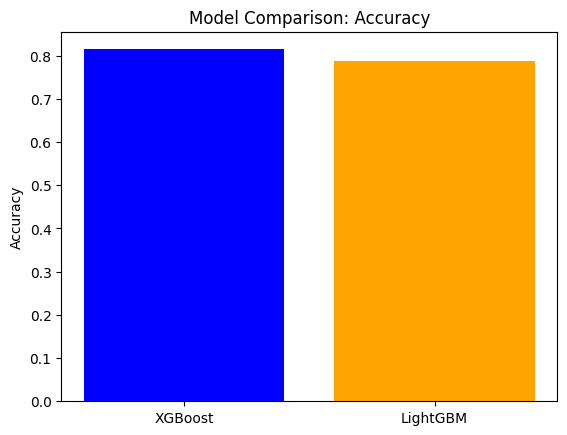

In [87]:
metrics_comparison = {
    'Model': ['XGBoost','LightGBM'],
    'Accuracy': [accuracy_score(y_test, xgbm_pred), accuracy_score(y_test, lgbm_pred)],
}

metrics_df = pd.DataFrame(metrics_comparison)

import matplotlib.pyplot as plt

plt.bar(metrics_df['Model'], metrics_df['Accuracy'], color=['blue', 'orange'])
plt.title('Model Comparison: Accuracy')
plt.ylabel('Accuracy')
plt.show()